# Previsão de Rotatividade de Funcionários

A empresa XYZ, com cerca de 4000 funcionários, enfrenta uma taxa de rotatividade anual de 15%. Esse alto índice de saída prejudica a produtividade, gera custos com recrutamento e treinamento de novos colaboradores. O objetivo é construir um modelo que preveja a probabilidade de um funcionário deixar a empresa, identificando os principais fatores que influenciam essa decisão. Com essas informações, a empresa poderá tomar medidas para melhorar a retenção de talentos e reduzir os impactos da rotatividade.

## Configuração inicial

In [138]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [139]:
seed = 21
np.random.seed(seed)

## Obtenção dos dados

In [159]:
import pandas as pd

url = 'https://raw.githubusercontent.com/amandatz/employee-attrition-analysis/main/data/data.csv'
employees = pd.read_csv(url)

## Descrição








O conjunto possui 24 colunas, sendo elas:

| **#** | **Atributo**                 | **Descrição**                                                     | **Rótulos (Labels)**                                    |
|-------|------------------------------|-------------------------------------------------------------------|--------------------------------------------------------|
| 1     | **Age**                       | Idade do empregado                                                |                                                        |
| 2     | **Attrition**                 | Se o empregado deixou a empresa no último ano ou não              |                                                        |
| 3     | **BusinessTravel**            | Frequência com que os empregados viajaram para fins de negócios no último ano |                                                        |
| 4     | **Department**                | Departamento em que o empregado trabalha                          |                                                        |
| 5     | **DistanceFromHome**          | Distância de casa em quilômetros                                  |                                                        |
| 6     | **Education**                 | Nível de escolaridade do empregado                                | 1. Abaixo do Ensino Superior (Below College) <br> 2. Ensino Superior (College) <br> 3. Bacharelado (Bachelor) <br> 4. Mestrado (Master) <br> 5. Doutorado (Doctor)|
| 7     | **EducationField**            | Área de formação do empregado                                     |                                                        |
| 8     | **EmployeeCount**             | Contagem de empregados                                            |                                                        |
| 9     | **EmployeeID**            | Número ou ID do empregado                                         |                                                        |
| 10    | **Gender**                    | Gênero do empregado                                               |                                                        |
| 11    | **JobLevel**                  | Nível de cargo na empresa, em uma escala de 1 a 5                 |                                                        |
| 12    | **JobRole**                   | Cargo ocupado pelo empregado na empresa                           |                                                        |
| 13    | **MaritalStatus**             | Estado civil do empregado                                         |                                                        |
| 14    | **MonthlyIncome**             | Renda mensal em rúpias (Moeda Indiana)                            |                                                        |
| 15    | **NumCompaniesWorked**        | Número total de empresas nas quais o empregado trabalhou          |                                                        |
| 16    | **Over18**                    | Indica se o empregado tem mais de 18 anos ou não                   |                                                        |
| 17    | **PercentSalaryHike**         | Percentual de aumento salarial no último ano                      |                                                        |
| 18    | **StandardHours**             | Número de horas padrão de trabalho para o empregado               |                                                        |
| 19    | **StockOptionLevel**          | Nível de opções de ações do empregado                             |                                                        |
| 20    | **TotalWorkingYears**         | Número total de anos que o empregado trabalhou                     |                                                        |
| 21    | **TrainingTimesLastYear**     | Número de vezes que o empregado participou de treinamentos no último ano |                                                        |
| 22    | **YearsAtCompany**            | Número total de anos que o empregado trabalhou na empresa         |                                                        |
| 23    | **YearsSinceLastPromotion**   | Número de anos desde a última promoção                            |                                                        |
| 24    | **YearsWithCurrManager**      | Número de anos com o atual gerente                                |                                                        |




A coluna "Attrition" é a variável dependente. Ela nos indica se o funcionário deixou a empresa no ano anterior ou não. Este é o objetivo do modelo: prever se um funcionário vai deixar a empresa com base nas outras variáveis.

**Observação:** Como o salário mensal está em Rúpias, imagino que esse dataset seja indiano. Observe a coluna "Education", existem níveis de educação que não fazem muito sentido no contexto brasileiro: Qual seria a diferença entre Ensino Superior e Bacharelado?. Observando [esta página da Wikipedia](https://en.wikipedia.org/wiki/Higher_education_in_India#Post-secondary_education_stages), imagino que "College" se refira ao "Vocational Degree", que é equivalente ao curso técnico brasileiro. Já o "Bachelor" se refere a um curso de graduação convencional.

Vejamos as 5 primeiras linhas do dataset:

In [141]:
employees.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [142]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [143]:
employees.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


Colunas que não tem nada a ver: EmployeeCount, EmployeeId

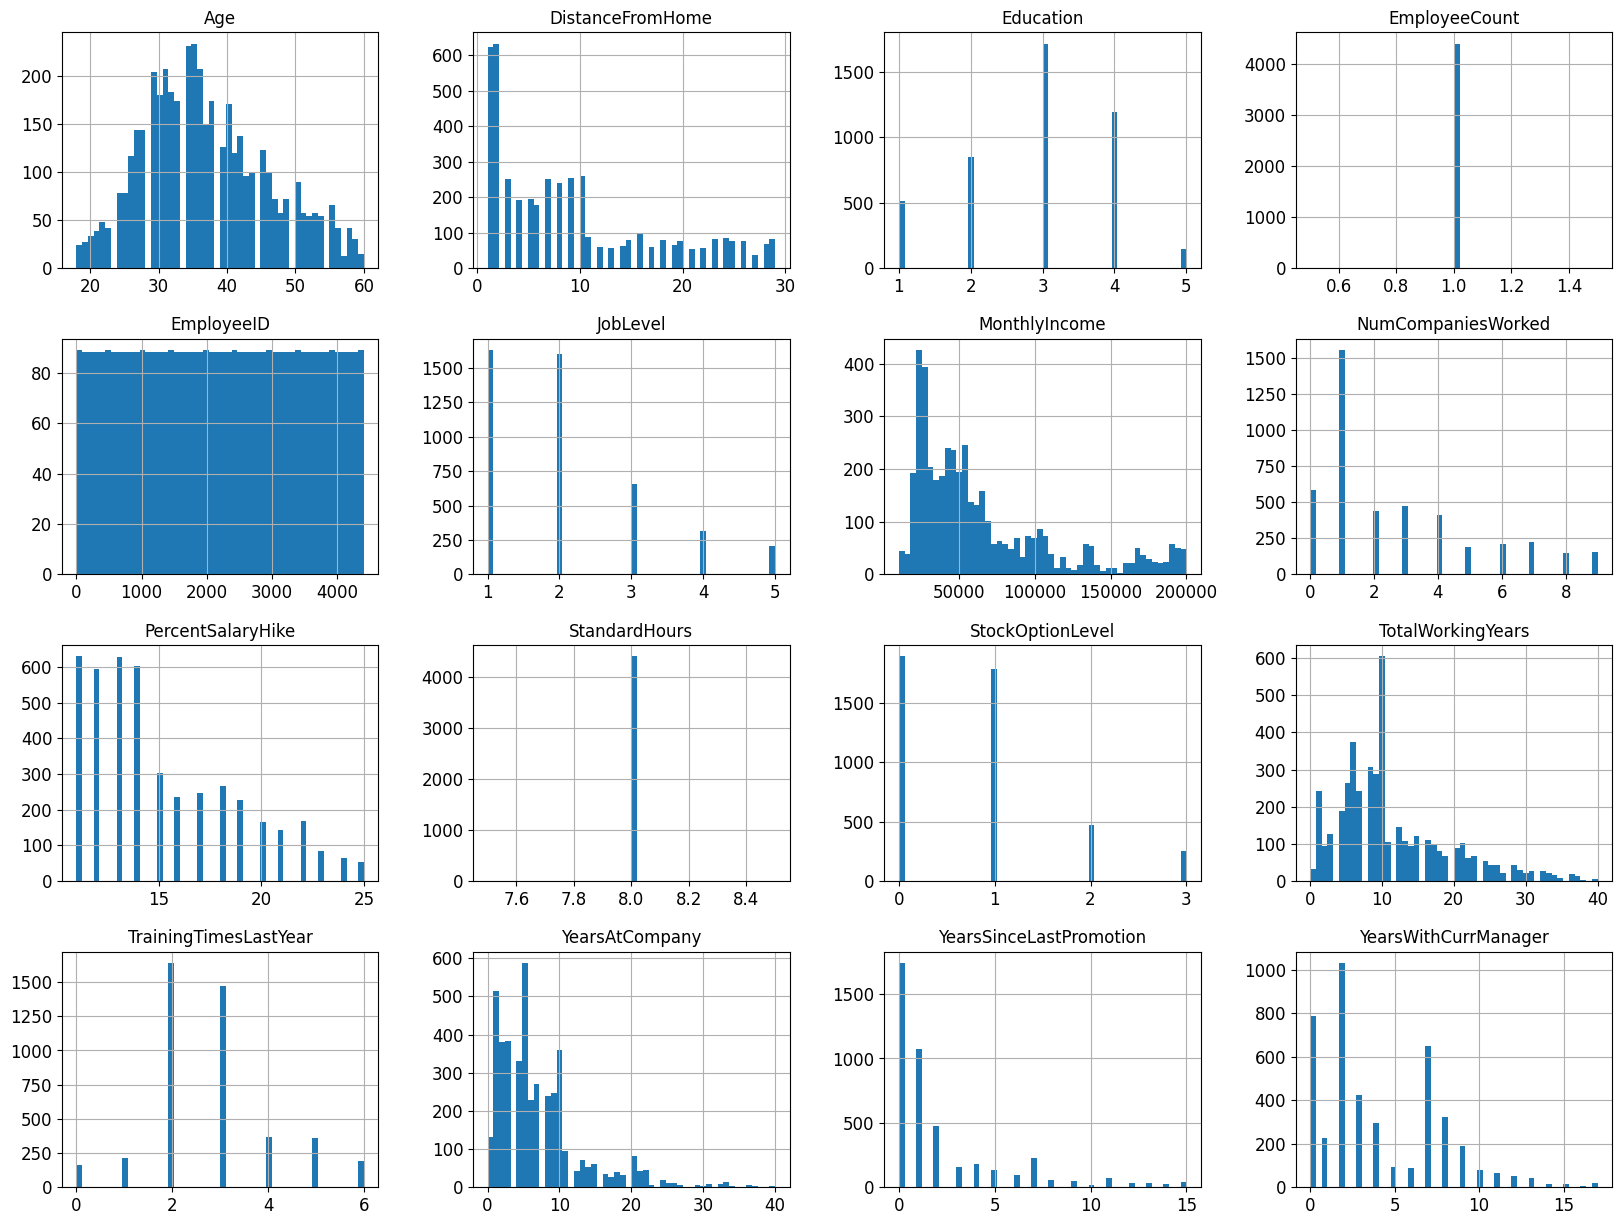

In [144]:
employees.hist(bins=50, figsize=(20,15))
plt.show()

## Separação dos dados

In [145]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(employees,
                                       test_size=0.2,
                                       random_state=seed)

train_set.shape, test_set.shape

((3528, 24), (882, 24))

## Visualização do conjunto de dados

In [146]:
employees = train_set.copy()

## Preparação dos dados




In [147]:
employees_target = employees['Attrition'].copy()
employees_features = employees.drop('Attrition', axis=1)

Começaremos removendo a coluna de `EmployeeID`. Embora seja útil para identificar individualmente os registros de cada funcionário, ela não possui informações que possam ajudar diretamente na predição da rotatividade dos funcionários.

In [148]:
from sklearn.preprocessing import FunctionTransformer

columns_to_remove = ['EmployeeID']

def drop_columns(X):
    return X.drop(columns=columns_to_remove, errors='ignore')

column_remover = FunctionTransformer(drop_columns, validate=False)

O dataset possui alguns dados não preenchidos. Veja que `NumCompaniesWorked` possui 19 dados faltantes e `TotalWorkingYears` possui 9 dados faltantes.

In [149]:
employees_features.isnull().sum()

,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeID,0
Gender,0
JobLevel,0


Ambas as colunas são compostas inteiramentes por dados numéricos. Estaremos preenchendo os itens nulos com a mediana através do `SimpleImputer`. Para isso, criaremos um Pipeline.

In [150]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_features = [
    'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
    'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

Além disso, existem diversas outras colunas não numéricas. Vejamos seus valores possíveis:

In [151]:
categorical_features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
    'MaritalStatus', 'Over18'
]

for column in categorical_features:
    print(f"Valores possíveis para '{column}':")
    print(employees_features[column].unique())
    print("-" * 40)


Valores possíveis para 'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------
Valores possíveis para 'Department':
['Research & Development' 'Sales' 'Human Resources']
----------------------------------------
Valores possíveis para 'EducationField':
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Human Resources'
 'Technical Degree']
----------------------------------------
Valores possíveis para 'Gender':
['Male' 'Female']
----------------------------------------
Valores possíveis para 'JobRole':
['Laboratory Technician' 'Research Scientist' 'Manufacturing Director'
 'Manager' 'Research Director' 'Healthcare Representative'
 'Sales Representative' 'Sales Executive' 'Human Resources']
----------------------------------------
Valores possíveis para 'MaritalStatus':
['Married' 'Single' 'Divorced']
----------------------------------------
Valores possíveis para 'Over18':
['Y']
----------------------------------------


Precisamos transformar os valores dessas colunas em valores numéricos. A única coluna que possui valores que seguem uma ordem é a `BusinessTravel` (Non-Travel, Travel_Rarely, Travel_Frequently). Para ela, estaremos usando o `OrdinalEnconder`. Para colunas binárias, como `Gender`, também estaremos usando-o. As outras não seguem uma ordem clara; o melhor é utilizar `OneHotEncoder`.

Além disso, não sabemos se os dados de teste possuem todos os valores preenchidos. Para tando, também será preciso utilizar o `SimpleImputer` utilizando a moda como estratégia.

In [152]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ordinal_features = ['BusinessTravel', 'Gender']

categories = [['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],['Male', 'Female']]

onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan, categories=categories))
])

Combinamos todos os pré-processadores em um `ColumnTransformer`. Juntaremos com o processo de remover a coluna feito inicialmente num único Pipeline.

In [153]:
from sklearn.compose import ColumnTransformer

preprocessor = Pipeline(steps=[
    ('drop_column', column_remover),
    ('transformer', ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', onehot_transformer, [col for col in categorical_features if col not in ordinal_features]),
        ('ord', ordinal_transformer, ordinal_features)
      ])
    )
])

employees_prepared = preprocessor.fit_transform(employees_features)

In [154]:
employees_prepared

array([[-0.8655197 , -0.88463471,  1.06297479, ...,  1.        ,
         1.        ,  1.        ],
       [-0.31991103, -0.26376432, -1.88991896, ...,  1.        ,
         1.        ,  1.        ],
       [-1.52025011,  1.35049868,  1.06297479, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-0.64727623, -0.3879384 ,  0.07867687, ...,  1.        ,
         1.        ,  1.        ],
       [-0.5381545 , -0.88463471,  0.07867687, ...,  1.        ,
         1.        ,  1.        ],
       [-0.64727623,  0.85380237,  0.07867687, ...,  1.        ,
         1.        ,  1.        ]])

In [155]:
employees_prepared.shape

(3528, 39)

## Comparação entre modelos


## Ajustes e seleção do modelo

## Modelo e teste final